# Description

This Notebook is trying to train a dataset of the middle tier of hoursing price in US metro breakdown with Random Forest Regression. We have the location info as States, and the July price of 2021 and 2020. We want to predict the housing price of July 2022

In [21]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from rfpimp import *
from sklearn.ensemble import RandomForestRegressor
import statistics

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Functions we can use later

#from sklearn.metrics import accuracy_score
#import tensorflow as tf
#from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
AllData_df = pd.read_csv("../Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
AllData_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,...,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22
0,102001,0,United States,Country,NaN,128193.0,128540.0,128904.0,129647.0,130396.0,...,315164.0,319079.0,323445.0,328180.0,333400.0,338673.0,344230,349265,353446,355852
1,394913,1,"New York, NY",Msa,NY,225281.0,226627.0,227838.0,230222.0,232442.0,...,571576.0,575145.0,578396.0,582369.0,587022.0,593470.0,600621,608159,614185,618517
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,228935.0,229732.0,230953.0,233274.0,235763.0,...,842992.0,850126.0,859335.0,870012.0,882230.0,899552.0,918626,935074,936406,933282
3,394463,3,"Chicago, IL",Msa,IL,170843.0,171246.0,171768.0,172812.0,173918.0,...,287525.0,290233.0,292966.0,295614.0,298193.0,301504.0,304988,308971,311970,313828
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130922.0,131027.0,131114.0,131327.0,131550.0,...,334386.0,339874.0,345774.0,353216.0,361748.0,369869.0,379389,388117,395694,397905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,92315.0,92898.0,94520.0,96173.0,98420.0,99618.0,100672,101760,103304,104979
904,753874,930,"Craig, CO",Msa,CO,95095.0,95441.0,96026.0,96721.0,97438.0,...,243717.0,245335.0,248749.0,251721.0,254099.0,254350.0,254500,255437,259311,263752
905,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,168739.0,169789.0,172586.0,175328.0,177808.0,179610.0,182332,185288,188386,190824
906,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,80013.0,80302.0,82456.0,84690.0,87331.0,88024.0,88679,88968,90141,91552


In [3]:
AllData_df.nunique()

RegionID      908
SizeRank      904
RegionName    908
RegionType      2
StateName      51
             ... 
3/31/22       904
4/30/22       906
5/31/22       906
6/30/22       907
7/31/22       908
Length: 276, dtype: int64

In [4]:
july_df=AllData_df[['RegionID', 'RegionName','StateName', '7/31/20','7/31/21','7/31/22']]
july_df.nunique()

RegionID      908
RegionName    908
StateName      51
7/31/20       895
7/31/21       900
7/31/22       908
dtype: int64

In [5]:
july_df=july_df.dropna()
july_df=july_df.drop(columns=['RegionID','RegionName'])

In [6]:
july_df.head()

,StateName,7/31/20,7/31/21,7/31/22
1,NY,489474.0,553452.0,618517
2,CA,685733.0,815943.0,933282
3,IL,245313.0,277631.0,313828
4,TX,263109.0,313134.0,397905
5,PA,258636.0,301935.0,338231


In [7]:
july2022 = july_df['7/31/22']
avg_price=july2022.mean()
print(f'Average housing price in the United States is ${avg_price}')

Average housing price in the United States is $267978.93265993265


In [8]:
bystate=july_df.groupby(['StateName']).mean()
bystate=bystate.reset_index()
bystate.head()

,StateName,7/31/20,7/31/21,7/31/22
0,AK,303952.750000,321684.750000,347937.250000
1,AL,138220.666667,156691.857143,183862.952381
2,AR,107795.200000,120754.850000,140997.300000
3,AZ,242869.454545,307062.272727,380385.363636
4,CA,463558.424242,558103.363636,640983.212121


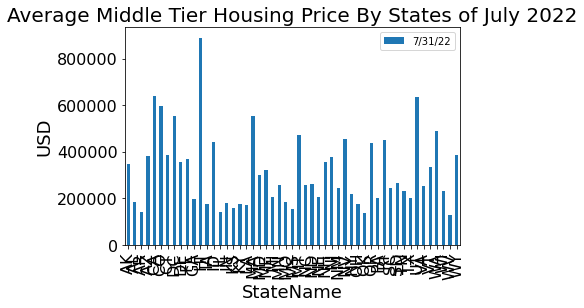

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# bystate.plot(kind="bar", color="red")
bystate.plot.bar('StateName','7/31/22', style='-o')
plt.xlabel('StateName', size=18)
plt.ylabel('USD', size=18)
plt.xticks(rotation=90,size=16)
plt.yticks(size=16)
plt.title("Average Middle Tier Housing Price By States of July 2022", size=20)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

In [10]:
# july_copy=july_df.copy()
# numbers=[*range(1,52,1)]
# numbers=pd.DataFrame(numbers, columns=["StateNo"])
# numbers


In [11]:
# july_copy["StateName"].tolist()

In [12]:
# states=july_copy["StateName"].unique().tolist()
# states

In [13]:
# dict={states[i]: numbers[i] for i in range(len(states))}
# dict

In [14]:
# for state in july_copy["StateName"].tolist()
#         if state in states
#         state=dict[state]

In [15]:
X, y = july_df[['7/31/20','7/31/21']], july_df['7/31/22']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) # use 10 trees
rf.fit(X, y)

RandomForestRegressor()

In [17]:
unknown_x = [330000, 350000]
predicted_y = rf.predict([unknown_x])
print(predicted_y)

[432126.02]


/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [18]:
from sklearn.metrics import mean_absolute_error

predictions = rf.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
print(f"${e:.0f} average error; {ep:.2f}% error")

$5005 average error; 1.87% error


In [26]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score 0.9768



## Checking model generality

In [25]:
from sklearn.model_selection import train_test_split

X, y = july_df[['7/31/20','7/31/21']], july_df['7/31/22']
# 20% of data goes into test set, 80% into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")



$14110 average error; 5.27% error


## Improve the accuracy

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

In [ ]:
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

# Add location

In [32]:
july_df

,StateName,7/31/20,7/31/21,7/31/22
1,NY,489474.0,553452.0,618517
2,CA,685733.0,815943.0,933282
3,IL,245313.0,277631.0,313828
4,TX,263109.0,313134.0,397905
5,PA,258636.0,301935.0,338231
...,...,...,...,...
903,TX,79789.0,89095.0,104979
904,CO,203485.0,233731.0,263752
905,TX,135280.0,154038.0,190824
906,TX,72824.0,78516.0,91552


In [33]:
dummy_df=pd.get_dummies(july_df)
dummy_df

,7/31/20,7/31/21,7/31/22,StateName_AK,StateName_AL,StateName_AR,StateName_AZ,StateName_CA,StateName_CO,StateName_CT,...,StateName_SD,StateName_TN,StateName_TX,StateName_UT,StateName_VA,StateName_VT,StateName_WA,StateName_WI,StateName_WV,StateName_WY
1,489474.0,553452.0,618517,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,685733.0,815943.0,933282,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,245313.0,277631.0,313828,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,263109.0,313134.0,397905,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,258636.0,301935.0,338231,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,79789.0,89095.0,104979,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
904,203485.0,233731.0,263752,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
905,135280.0,154038.0,190824,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
906,72824.0,78516.0,91552,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
y = dummy_df['7/31/22']
X = dummy_df.drop(columns=['7/31/22'])
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) # use 10 trees
rf.fit(X, y)

RandomForestRegressor()

In [36]:
predictions = rf.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
print(f"${e:.0f} average error; {ep:.2f}% error")

$4282 average error; 1.60% error


In [37]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score 0.9747


In [38]:
y = dummy_df['7/31/22']
X = dummy_df.drop(columns=['7/31/22'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [39]:
rf = RandomForestRegressor(n_estimators=10, random_state=78)
rf_model=rf.fit(X_train, y_train)


# Evaluate the model
y_pred = rf_model.predict(X_test)

#print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$15575 average error; 5.81% error


In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=78)
rf_model=rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$14817 average error; 5.53% error


In [42]:
# noisy_oob_r2 = rf.oob_score_
# print(f"OOB score {noisy_oob_r2:.4f}")

## Importance

In [ ]:
from rfpimp import *
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I

In [ ]:
states=july_df.StateName.value_counts()
states

In [ ]:
july_df['7/31/22']=july_df['7/31/22'].astype(float)
yoy_df=july_df[['7/31/20','7/31/21','7/31/22']]
yoy_df.dtypes

In [ ]:
yoy_df.head()

In [ ]:
yoy_df.var(axis=1)